In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import welch
import pandas as pd
import seaborn
import numpy as np
from matplotlib.colors import LogNorm
import math  #<......necesario
Samples = 201

In [3]:
filename = "/home/natalia/Escritorio/ciencia-de-datos/tp-2/P01.mat"

In [4]:
p01 = sio.loadmat(filename)

In [5]:
matrix_p01 = p01['data']

print matrix_p01.shape

#epoch x electrodos x muestras

cant_epochs = matrix_p01.shape[0]
cant_electrodos = matrix_p01.shape[1]
cant_muestras = matrix_p01.shape[2] 
#SAMPLES

(894, 256, 201)


In [6]:
#electrodo 8
electrodo_8_matrix = matrix_p01[:, 8, :]
electrodo_44_matrix = matrix_p01[:,44, :]
electrodo_80_matrix = matrix_p01[:, 80, :]
electrodo_131_matrix = matrix_p01[:, 131, :]
electrodo_185_matrix = matrix_p01[:, 185, :]
#print electrodo_8_matrix.shape
#print electrodo_44_matrix.shape

In [7]:
#Tamaño de un bin = (max(x)-min(x)) * (2*(x.75-x.25)^-1) * n^{1/3}

#x.75 y x.25 son los cuartiles de la mustra, es decir los valores que acumulan .25 y .75 de probabilidad
#suponindo que tomamos a todos los elementos de la matriz con igual probabilidad 1/(#elementos)
#los cuartiles surgen de ordenar los elementos 
#y tomar el que deje 1/4 de probabilidad(#elementos) a la derecha = x25
#y el que deje 1/4 de probabilidad(#elementos) a la izquierda = x75

In [8]:
def calculate_bin_max_min(matrix_sujeto, max_val, min_val,t_bin):
    x25_parcial = np.zeros(cant_electrodos)
    x75_parcial = np.zeros(cant_electrodos)
    max_parcial = np.zeros(cant_electrodos)
    min_parcial = np.zeros(cant_electrodos)
    
    #fila y columna de la matriz: electrodo_actual<<
    tam_fila = cant_epochs
    tam_columna = cant_muestras

    n_val = tam_fila*tam_columna

    f_x75 = int((n_val*0.75) % tam_fila)
    c_x75 = int((n_val*0.75) / tam_fila)
    f_x25 = int((n_val*0.25) % tam_fila)
    c_x25 = int((n_val*0.25) / tam_fila)

    for i in range(0,cant_electrodos):
        electrodo_actual = matrix_sujeto[:, i, :]

        max_parcial[i] = electrodo_actual.max()
        min_parcial[i] = electrodo_actual.min()
        
        electrodo_actual.sort(axis=0)

        x75_parcial[i] = electrodo_actual[f_x75][c_x75]
        x25_parcial[i] = electrodo_actual[f_x25][c_x25]
        
    x25 = np.mean(x25_parcial)
    x75 = np.mean(x75_parcial)
    max_val = np.mean(max_parcial)
    min_val = np.mean(min_parcial)
    
    t_bin = 2 * (x75-x25) * (math.pow(n_val,1/3))

    return max_val,min_val,t_bin
    #print (max_val-min_val)/t_bin

In [9]:
max_val,min_val,t_bin = calculate_bin_max_min(matrix_p01, 0, 0,0)
print max_val
print min_val
print t_bin

8.69419076427e-05
-7.94926540323e-05
1.97052410811e-05


In [10]:
#print electrodo_8_matrix_sort

In [11]:
#cantidad de bins
#print (max_8-min_8)/t_bin

In [12]:
def calculate_serie(electrodo_matrix, electrodo_serie, min_val, t_bin):
    tam_fila = electrodo_matrix.shape[0] #cant_epochs
    tam_columna = electrodo_matrix.shape[1] #cant_muestras

    vec = np.zeros(9)
    a = 0

    for i in range(0,tam_fila):
        for j in range(0,tam_columna):
            if ((electrodo_matrix[i][j] < (min_val+t_bin))):
                vec[0]=vec[0]+1
                electrodo_serie[i][j] = ord('A')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+2*t_bin)) & (electrodo_matrix[i][j] >= (min_val+t_bin))):
                vec[1]=vec[1]+1
                electrodo_serie[i][j] = ord('B')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+3*t_bin)) & (electrodo_matrix[i][j] >= (min_val+2*t_bin))):
                vec[2]=vec[2]+1
                electrodo_serie[i][j] = ord('C')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+4*t_bin)) & (electrodo_matrix[i][j] >= (min_val+3*t_bin))):
                vec[3]=vec[3]+1
                electrodo_serie[i][j] = ord('D')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+5*t_bin)) & (electrodo_matrix[i][j] >= (min_val+4*t_bin))):
                vec[4]=vec[4]+1
                electrodo_serie[i][j] = ord('E')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+6*t_bin)) & (electrodo_matrix[i][j] >= (min_val+5*t_bin))):
                vec[5]=vec[5]+1
                electrodo_serie[i][j] = ord('F')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+7*t_bin)) & (electrodo_matrix[i][j] >= (min_val+6*t_bin))):
                vec[6]=vec[6]+1
                electrodo_serie[i][j] = ord('G')
                a=a+1
            if ((electrodo_matrix[i][j] < (min_val+8*t_bin)) & (electrodo_matrix[i][j] >= (min_val+7*t_bin))):
                vec[7]=vec[7]+1
                electrodo_serie[i][j] = ord('H')
                a=a+1
            if (electrodo_matrix[i][j] >= (min_val+8*t_bin)):
                vec[8]=vec[8]+1
                electrodo_serie[i][j] = ord('I')
                a=a+1
    return vec
    #print (tam_fila*tam_columna)-a

In [13]:
electrodo_8_serie = np.zeros((cant_epochs, cant_muestras))
electrodo_44_serie = np.zeros((cant_epochs, cant_muestras))
electrodo_80_serie = np.zeros((cant_epochs, cant_muestras))
electrodo_131_serie = np.zeros((cant_epochs, cant_muestras))
electrodo_185_serie = np.zeros((cant_epochs, cant_muestras))

print min_val
print t_bin

proba_8 = calculate_serie(electrodo_8_matrix,electrodo_8_serie, min_val, t_bin)
proba_44 = calculate_serie(electrodo_44_matrix,electrodo_44_serie, min_val, t_bin)
proba_80 = calculate_serie(electrodo_80_matrix,electrodo_80_serie, min_val, t_bin)
proba_131 = calculate_serie(electrodo_131_matrix,electrodo_131_serie, min_val, t_bin)
proba_185 = calculate_serie(electrodo_185_matrix,electrodo_185_serie, min_val, t_bin)

-7.94926540323e-05
1.97052410811e-05


In [14]:
#electrodo_8_serie

In [15]:
#entropia = -sum(p(i),log(p(i)))
def calculate_entropia(proba_x):
    res=0
    for i in range(0,len(proba_x)):
        res = res + (proba_x[i]/(cant_epochs*cant_muestras))*math.log((proba_x[i]/(cant_epochs*cant_muestras))+1,10)
    print -res

In [16]:
calculate_entropia(proba_8)
calculate_entropia(proba_44)
calculate_entropia(proba_80)
calculate_entropia(proba_131)
calculate_entropia(proba_185)

-0.167360321199
-0.170232015807
-0.170742367687
-0.168989829069
-0.166108697096


In [17]:
def conteo_conjunta(matrix_serie_1,matrix_serie_2):
    mat = np.zeros((9,9))

    tam_fila_serie = matrix_serie_1.shape[0]
    tam_columna_serie = matrix_serie_1.shape[1]

    size_serie = tam_fila_serie*tam_columna_serie
    
    for i in range(0,tam_fila_serie):
        for j in range(0,tam_columna_serie):
            index_f = int(matrix_serie_1[i][j]-ord('A'))
            index_c = int(matrix_serie_2[i][j]-ord('A'))
            mat[index_f][index_c]=mat[index_f][index_c]+1
    return mat, size_serie

In [18]:
def calculate_entropia_conjunta(matrix_serie_1,matrix_serie_2):

    mat, size_serie = conteo_conjunta(matrix_serie_1,matrix_serie_2)
    
    res=0
    for h in range(0,mat.shape[0]):
        for k in range(0,mat.shape[1]):
            if(mat[h][k]!=0):
                res=res+(mat[h][k]/size_serie)*math.log(mat[h][k]/size_serie)
    return -res

In [19]:
print calculate_entropia_conjunta(electrodo_8_serie,electrodo_44_serie)
print calculate_entropia_conjunta(electrodo_8_serie,electrodo_80_serie)
print calculate_entropia_conjunta(electrodo_44_serie,electrodo_80_serie)

0.917863989709
0.942962808704
0.881947791172


In [20]:
def calculate_informacion_mutua(matrix_serie_1,matrix_serie_2,proba_1,proba_2):
    
    mat, size_serie = conteo_conjunta(matrix_serie_1,matrix_serie_2)

    tam_fila = mat.shape[0]
    tam_columna = mat.shape[1]
    res=0
    for h in range(0,tam_fila):
        for k in range(0,tam_columna):
            if((proba_1[h]!=0) & (proba_2[k]!=0) & (mat[h][k]!=0)):
                res=res+(mat[h][k]/size_serie)*math.log((mat[h][k]/size_serie)/(proba_1[h]*proba_2[k]))
    return -res

In [21]:
print calculate_informacion_mutua(electrodo_8_serie,electrodo_44_serie,proba_8,proba_44)
print calculate_informacion_mutua(electrodo_8_serie,electrodo_80_serie,proba_8,proba_80)
print calculate_informacion_mutua(electrodo_44_serie,electrodo_80_serie,proba_44,proba_80)

23.4973400677
23.5291656544
23.5032813084


#### falta ver que graficamos , el test

In [89]:
def media_entre_canales(matrix_sujeto):
    matrix_media_electrodos = np.zeros((matrix_sujeto.shape[1],matrix_sujeto.shape[2]))
    #matrix_media_electrodos = (electrodos X muestras)
    for i in range(0,matrix_sujeto.shape[1]):
        electrodo_matrix = matrix_sujeto[:,i,:] # (epochs x muestras)
        matrix_media_electrodos[i] = np.mean(electrodo_matrix,axis=0) 
        #se promedian todos los epochs de 1 electrodo 
        #entonces queda (electrodos X muestras)
        #<- print matrix_media_electrodos[i].shape
    #print matrix_media_electrodos.shape
    return np.mean(matrix_media_electrodos,axis=0) 
    #se promedian los electrodos queda (1 x muestras)

In [93]:
m_e_c = media_entre_canales(matrix_p01)
m_e_c.shape 
#print mec

(201,)

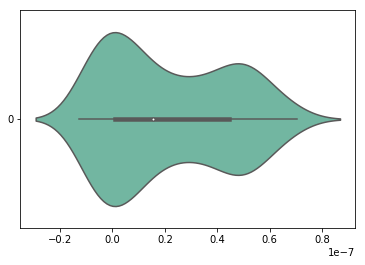

In [94]:
seaborn.violinplot(data = pd.DataFrame(m_e_c) , orient= "h", scale= "width", palette="Set2")
#plt.xlabel("V**2/Hz")
plt.show()